<img src="../img/cover.png">

# Training a binary classifier for reddit posts using Natural Language Processing (NLP) 

### Executive summary
<a href="#executive_summary">Executive summary</a> / 
<a href="#problem_statement">Problem statement</a> / 
<a href="#models">Models</a> / 
<a href="#results">Results</a> / 
<a href="#recommendations">Recommendations</a>

### Data analysis and modeling
<a href="#admin_and_setup">Administration and setup</a> / 
<a href="#cleaning_and_eda">Cleaning and exploratory data analysis (EDA)</a> / 
<a href="#data_preprocessing">Data preprocessing</a> / 
<a href="#modeling_and_evaluation">Modeling and evaluation</a> / 
<a href="#test_data">Final test data</a>

<hr>

<a name="executive_summary"></a>
# Executive summary

<em>What if you could tell where clients are in the recovery lifecycle based on their writing?</em>

It's rewarding, but challenging, to run recovery initiatives for people who want to control their problem alcohol and drug use, whether we are talking about inpatient or outpatient rehabilitation, or supervised injection sites with on-site access to treatment, counselling or support. Reviewing the thoughts and feelings of patients and clients, sometimes through their creative output, can be one part of the recovery process. 

In counselling, clients are not always truthful about their problem substance use because of guilt, shame and/or stigma. In response, I have developed a machine learning model that can help validate whether a client is still actively using substances or actively working on their recovery. The model has been trained and tested using online postings from reddit.com, to understand if content has come from subreddits where active substance use is discussed versus subreddits focused on recovery from addiction, despite the experience overlap from these two groups of potential clients. 

The model has a success rate of over 90 percent, which is higher than many subjective treatment modalities and less invasive and confrontational than other compliance tools such as urinalysis. And all the hard work happens behind the scenes in the model itself. It's my hope that this research can eventually contribute to better outcomes for people facing addiction and contemplating recovery. Because everyone, no matter what their circumstances, deserves their best chance for health, wellness, productivity and happiness.

<a name="problem_statement"></a>
# Problem statement

> Can I successfully build a natural language processing (NLP) binary-classification model that will distinguish between writing, in the form of reddit posts, by active substance users vs people in recovery from addiction? How accurate, and how generalizable, could it be?  

To answer this question, I constructed an NLP model which took as its training input the content from over 3,000 preprocessed reddit posts, half of them originating in four subreddits dedicated to discussion of active substance use and half of them from four subreddits focused on active recovery from drug and alcohol addiction. I ran the model using a train-test split, and then used another 600 reddit posts as unknown data for the model to classify as active drug use or active recovery. <em>The project will be considered successful if the model can properly identify 90 percent or more of the posts.</em>

<img src="../img/subreddits.png">

<hr>

## Some context: The recovery lifecycle

<img src="../img/recovery.png">



A core aspect of the recovery lifecycle is that very often, relapse is a part of the road to recovery—and it can occur at any point in the journey. This suggests that rather being two discrete groups of people, active substance users and people in recovery have shared histories and share a vocabulary.

I created a dataframe with the statistics of how many words could be found exclusively in drug-user posts or recovery posts, versus how many words were present in both groups of posts. The results are below.

In [12]:
stats = pd.read_csv('../data/stats.csv')
stats = stats.rename(index={0: 'number_of_words'})
stats_normalized = pd.read_csv('../data/stats_normalized.csv')
stats_normalized = stats_normalized.rename(index={0: 'percentage_of_words'})

In [13]:
stats.head()

,shared_words,drug_words,recovery_words,total
number_of_words,8288,2031,3001,13320


In [14]:
stats_normalized.head()

,shared_words,drug_words,recovery_words,total
percentage_of_words,62%,15%,23%,100%


Note not only the high degree of vocabulary overlap (62%), but also that there are words and expressions only used (within the sample) by active substance users or those active in recovery.

<a name="models"></a>
# Models 
Using sci-kit learn, we deployed four different models, using CountVectorizer in a "bag of words" model

> Naive Bayes Multinomial  
>
> Naive Bayes Gaussian
>
> Decision Tree (with hyperparameters tuned using GridSearchCV)
>
> Random Forest (with hyperparameters tuned using RandomizedSearchCV)

<hr>

<a name="results"></a>
# Results 
I used train-test split to train and assess our models using the following criteria:

> <b>Accuracy (and the variance between train and test accuracy to detect over- or underfitting)</b><em>To what extent can the model successfully classify?</em><p>
> <b>Precision</b>
> <em>Ratio of correctly predicted positive observations to the total predicted positive observations</em><p>
> <b>Recall</b>
> <em>Ratio of correctly predicted positive observations to the all observations in actual class</em><p>
> <b>F1 score</b>
> <em>Weighted average of precision and recall, taking false negatives and false positives into account</em>
<hr>

# Successful model 
The model that I successfully deployed against unknown data in a new test set was the Naive Bayes Gaussian.

<img src="../img/final.png">

> This model boasted the highest accuracy of all models tested, as well as the smallest variance between accuracy against training vs test data; the model was actually slightly underfitted at -4.85% variance.
<hr>

# Model overview 
We trained two different Naive Bayes models: Multinomial and Gaussian. 
<img src="../img/bayes-scores.png"><img src="../img/bayes-cm.png">
Both models performed well and were slightly underfit. Multinomial had a lower variance, but it was edged out by Gaussian in all other metrics.

# Model overview 
I trained and optimized a decision-tree model. 
<img src="../img/dtree-scores.png"><img src="../img/dtree-cm.png">
The default decision-tree model was dramatically overfit at over 25%. Optimization using GridSearchCV helped reduce overfitting but at the significant expense of accuracy.

# Model overview 
I also trained and optimized a random-forest model. 

<img src="../img/rforest-scores.png"><img src="../img/rforest-cm.png">

The default model was significantly overfit; optimization helped, but overall performance compared unfavourably with the NB models.

# Data visualization

I took all the scores of all of the models and put them into a dataframe for comparison purposes.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
evaluation = pd.read_csv('../data/evaluation.csv')

In [16]:
evaluation.head(10)

,model,Variance,train_accuracy,test_accuracy,test_precision,test_recall,test_f1
0,Naïve Bayes Multinomial,-1.56,91.78,93.34,99.32,90.25,94.57
1,Naïve Bayes Gaussian,-4.85,90.63,95.47,92.24,1.00,95.96
2,Decision Tree,25.74,99.64,73.90,78.77,77.01,77.88
3,Decision Tree Optimized,6.33,78.63,72.30,71.69,78.89,75.12
4,Random Forest,18.55,99.64,81.09,91.55,79.25,84.96
5,Random Forest Optimized,13.84,94.27,80.43,91.32,79.37,84.93
6,Final Naïve Bayes Gaussian,0.00,0.00,96.44,93.91,1.00,96.86


<img src="../img/model-comparison.png">

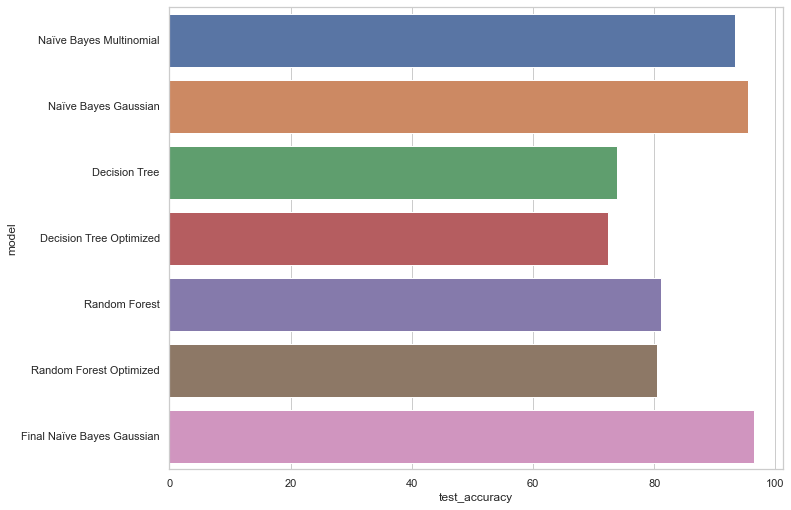

In [17]:
sns.set(style="whitegrid")
fig_dims = (11, 8.5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="test_accuracy", y="model", data=evaluation)

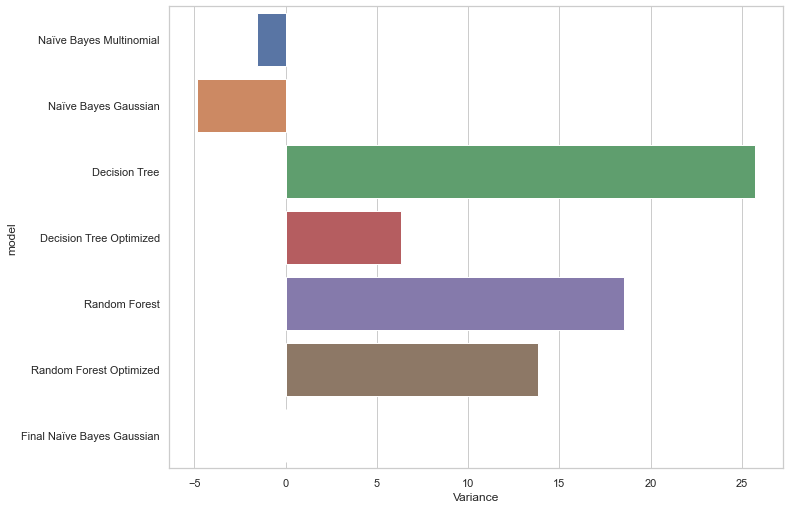

In [18]:
sns.set(style="whitegrid")
fig_dims = (11, 8.5)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.barplot(x="Variance", y="model", data=evaluation)

<a name="recommendations"></a>
# Conclusions and recommendations 
I conclude from the model statistics that this project is viable and meets the criteria for success. Next steps include expanding the model's training to include as many pieces of content as is computationally reasonable, and to strategize about further experiments with different inputs, including different forms of social media and other writing sources.  

<hr>

<a name="admin_and_setup"></a>
# Technical implementation

## Administration and setup 

### Imports

In [2]:
# Note: Running all cells will take approximately 70 minutes to complete

# pandas and numpy
import pandas as pd
import numpy as np

# http imports
import requests
from bs4 import BeautifulSoup

# nltk imports
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer

# sci-kit learn imports
from sklearn.base import TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier

# Presentation and visuals
import seaborn as sns
import matplotlib.pyplot as plt

# This magic line will allow you to generate plots
# within the Jupyter notebook.
%matplotlib inline
from IPython.display import HTML
from IPython.core.display import display, HTML
from IPython.core.interactiveshell import InteractiveShell
from IPython.display import Markdown, display
from pprint import pprint
pd.options.display.max_seq_items = 2000
pd.options.display.max_rows = 4000
#pd.set_option(display.max_columns), None

# other imports
import random
import regex as re
import time

## Get the reddit content

In [3]:
# Create a completely empty Dataframe without any column names, indices or data
df = pd.DataFrame()

In [4]:
# This should take less than a minute, not posing any
# undue pressure on Reddit's server resources

# Use a for loop to iterate through this list of subreddits, 
# using the PushShift API and requests to pull the content from a specific date
# then write the content into my pandas dataframe

subreddit_list = ['drugs', 'opiates', 'stims', 'drinking', 'recovery', 
                  'opiatesrecovery', 'redditorsinrecovery', 'stopdrinking']


for subreddit in subreddit_list:
    params = {'subreddit' : subreddit, 'size' : 500, 'before' : 1585819518}
    url = 'https://api.pushshift.io/reddit/submission/search'
    results = requests.get(url, params)
    rawdata = results.json()
    posts = rawdata['data']
    df = df.append(posts, sort=True)

In [5]:
# Confirm the subreddits and number of posts
df['subreddit'].value_counts()

Stims                  500
Drinking               500
OpiatesRecovery        500
recovery               500
opiates                500
Drugs                  500
REDDITORSINRECOVERY    500
stopdrinking           500
Name: subreddit, dtype: int64

<a name="cleaning_and_eda"></a>
## Cleaning and exploratory data analysis (EDA)

In [6]:
# Some typical EDA

df.columns # we are only interested in subreddit and selftext

Index(['all_awardings', 'allow_live_comments', 'author', 'author_cakeday',
       'author_flair_background_color', 'author_flair_css_class',
       'author_flair_richtext', 'author_flair_template_id',
       'author_flair_text', 'author_flair_text_color', 'author_flair_type',
       'author_fullname', 'author_patreon_flair', 'author_premium', 'awarders',
       'banned_by', 'can_mod_post', 'contest_mode', 'created_utc',
       'crosspost_parent', 'crosspost_parent_list', 'domain', 'edited',
       'full_link', 'gildings', 'id', 'is_crosspostable', 'is_meta',
       'is_original_content', 'is_reddit_media_domain', 'is_robot_indexable',
       'is_self', 'is_video', 'link_flair_background_color',
       'link_flair_css_class', 'link_flair_richtext', 'link_flair_template_id',
       'link_flair_text', 'link_flair_text_color', 'link_flair_type', 'locked',
       'media', 'media_embed', 'media_metadata', 'media_only', 'no_follow',
       'num_comments', 'num_crossposts', 'over_18', 'parent_

In [7]:
df.dtypes # created_utc is in Unix epoch time

all_awardings                     object
allow_live_comments                 bool
author                            object
author_cakeday                    object
author_flair_background_color     object
author_flair_css_class            object
author_flair_richtext             object
author_flair_template_id          object
author_flair_text                 object
author_flair_text_color           object
author_flair_type                 object
author_fullname                   object
author_patreon_flair              object
author_premium                    object
awarders                          object
banned_by                         object
can_mod_post                        bool
contest_mode                        bool
created_utc                        int64
crosspost_parent                  object
crosspost_parent_list             object
domain                            object
edited                           float64
full_link                         object
gildings        

In [8]:
df.shape # There are 4,000 observations vs 79 standard features in the original Reddit dataset

(4000, 79)

In [9]:
df['author'].value_counts() # There are 4,000 posts written by 2,852 authors

S1eep1essInSeatt1e      66
[deleted]               33
Dirty_D_Damnit          17
guacatmole              14
awp501                  13
isaacsauce555           12
TheNewJanBrady          11
HoneyBeeBzz             11
Kranes32                11
psxchosocial            10
Astimf21                10
Alissa143               10
Empty_Lettuce            9
BermudaDreieck           9
kp6615                   9
setsekaj                 8
DMTMA                    8
ivan_darulevskij         8
Tweaking_Hard            8
fappinatwork             8
bunnyb2004               8
Gottchen                 8
ADAPdevelopment          8
butterflyfrenchfry       7
clovergirlerin           7
speedbackzzz             7
bl00d_                   7
VeinStereo               7
ahansman2020             7
TaosLady                 7
songbirdjen              7
Dokus-Pokus              7
chocoloco54              7
prada666                 6
DMTGod69                 6
Esby1211                 6
mike_f1988               6
V

In [10]:
# Let's replace the text in our target variable with binary values where heroin = 0 and recovery = 1

subreddit_list_dict = {'Drugs' : 0, 
                       'opiates' : 0, 
                       'Stims' : 0, 
                       'Drinking' : 0 , 
                       'recovery' : 1, 
                       'OpiatesRecovery' : 1, 
                       'REDDITORSINRECOVERY' : 1, 
                       'stopdrinking' : 1}

df.replace(subreddit_list_dict, inplace=True)

In [11]:
# Some basic data cleaning

df.fillna(method = 'bfill', inplace=True) # Replace the very few nans with nearby content
df = df[df.selftext != ''] # Remove posts that are just an empty string
df = df[df.selftext != '[removed]'] # Get rid of posts marked as already removed by reddit
df = df[['subreddit', 'selftext']] # Reconstitute df with only the relevant features
df.shape # with bad content removed

(3002, 2)

In [12]:
df.reset_index(inplace = True)
df.to_csv("../data/train.csv", index = False)

<a name="data_preprocessing"></a>
# Data preprocessing

In [13]:
# Preprocess the posting content; this should take under 2 minutes
# start an empty list to hold preprocessed postings

processed_postings = [] 
for i in range(len(df)):  # for each post
    posting = re.sub('[^a-zA-Z]', ' ', df['selftext'][i]) # remove non text characters
    posting = posting.lower() # lower-case everything
    posting = posting.split() # split into words
    ps = PorterStemmer() # instantiate the Porter word stemmer
    posting = [ps.stem(word) for word in posting if not word in set(stopwords.words('english'))] # reduce to only stemmed non-stopwords
    posting = ' '.join(posting) # reassemble the string
    df['selftext'][i] = posting
    processed_postings.append(posting) # add it to the corpus

C:\Users\shawn\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [14]:
df.reset_index(inplace = True)
df = df[['subreddit', 'selftext']]
df.to_csv("../data/train.csv", index = False)

Having reviewed the data, I am confident that it contains what I need to successfully train the model, and the overlap of content is sufficient to make this a complex problem to solve. 

# CountVectorizer and Train/test split

In [15]:
# Instantiate the CountVectorizer and fit it to our data
# Look at its parameters
# This takes about two minutes to run

cvec = CountVectorizer()
X = cvec.fit_transform(processed_postings).toarray()
y = df.iloc[:, 0].values
pprint(cvec.get_params())       

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': <class 'numpy.int64'>,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': None,
 'min_df': 1,
 'ngram_range': (1, 1),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}


In [16]:
# Set up our train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42, stratify = y)

In [17]:
# Baseline 
(unique, counts) = np.unique(y_test, return_counts=True)
frequencies = np.asarray((unique, counts)).T
frequencies

# This shows us, after some posts were removed, what is left; 
# 313 drug-user posts and 438 recovery posts
# NOTE: when the posts were run before cleaning at 50% each
# the results were similar

array([[  0, 313],
       [  1, 438]], dtype=int64)

<a name="modeling_and_evaluation"></a>
# Modeling and evaluation


## Naive Bayes model (Multinomial)

In [18]:
# Set up two instances of a Multinomial Bayes Model
# one for training 

MNNB_train = MultinomialNB()
MNNB_train.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [19]:
# And one for testing

MNNB_test = MultinomialNB()
MNNB_test.fit(X_test, y_test)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [20]:
# Make our predictions against test data
y_predictions_MNNB = MNNB_test.predict(X_test)
y_predictions_MNNB

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,

In [21]:
# Instantiate a confusion matrix and look at it
cm_MNNB = confusion_matrix(y_test, y_predictions_MNNB)
cm_MNNB

array([[266,  47],
       [  3, 435]], dtype=int64)

In [22]:
# Set variable for the confusion matrix values
tp_MNNB = 435
fp_MNNB = 3
tn_MNNB = 266
fn_MNNB = 47

# Calculate accuracy score
MNNB_accuracy_score = (tp_MNNB + tn_MNNB) / (tp_MNNB + tn_MNNB + fp_MNNB + fn_MNNB) 
MNNB_accuracy_score 

0.933422103861518

In [23]:
# Calculate precision score
MNNB_precision_score = tp_MNNB / (tp_MNNB + fp_MNNB)
MNNB_precision_score

0.9931506849315068

In [24]:
# Calculate recall score
MNNB_recall_score = tp_MNNB / (tp_MNNB + fn_MNNB)
MNNB_recall_score

0.9024896265560166

In [25]:
# Calculate F1 weighting

MNNB_F1_Score = 2 * MNNB_precision_score * MNNB_recall_score / (MNNB_precision_score + MNNB_recall_score)
MNNB_F1_Score 

0.9456521739130435

In [26]:
# Compare training and test accuracy scores

pprint(f'Score on training set: {MNNB_train.score(X_train, y_train)}')
pprint(f'Score on testing set: {MNNB_test.score(X_test, y_test)}')

'Score on training set: 0.9178143047534429'
'Score on testing set: 0.933422103861518'


## Naive Bayes model (Gaussian)

In [27]:
# Set up two instances of a Gaussian Naive Bayes Model
# one for training 

GaussianNB_train = GaussianNB()
GaussianNB_train.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [28]:
# and one for testing
GaussianNB_test = GaussianNB()
GaussianNB_test.fit(X_test, y_test)

GaussianNB(priors=None, var_smoothing=1e-09)

In [29]:
# Make our predictions
y_predictions_GaussianNB = GaussianNB_test.predict(X_test)
y_predictions_GaussianNB

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,

##### Evaluate the model

In [30]:
# Instantiate the confusion matrix
cm_GaussianNB = confusion_matrix(y_test, y_predictions_GaussianNB)
cm_GaussianNB

array([[313,   0],
       [ 34, 404]], dtype=int64)

In [31]:
# Assign variables to CM values
tp_GNB = 404
fp_GNB = 34
tn_GNB = 313
fn_GNB = 0

# Calculate the accuracy score
GaussianNB_accuracy_score = (tp_GNB + tn_GNB) / (tp_GNB + tn_GNB + fp_GNB + fn_GNB) 
GaussianNB_accuracy_score

0.9547270306258322

In [32]:
# Calculate the precision score
GaussianNB_precision_score = tp_GNB / (tp_GNB + fp_GNB)
GaussianNB_precision_score

0.9223744292237442

In [33]:
# Calculate the recall score
GaussianNB_recall_score = tp_GNB / (tp_GNB + fn_GNB)
GaussianNB_recall_score

1.0

In [34]:
# Calculate the F1 weighting
GaussianNB_F1_Score = 2 * GaussianNB_precision_score * GaussianNB_recall_score / (GaussianNB_precision_score + GaussianNB_recall_score)
GaussianNB_F1_Score 

0.9596199524940617

In [35]:
# Compare training and testing accuracy score

pprint(f'Score on training set: {GaussianNB_train.score(X_train, y_train)}')
pprint(f'Score on testing set: {GaussianNB_test.score(X_test, y_test)}')

'Score on training set: 0.9062638827187917'
'Score on testing set: 0.9547270306258322'


## Decision Tree Classifier

In [36]:
# Instantiate the decision tree classifier; view its parameters

DTreeClassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
pprint(DTreeClassifier.get_params())

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 42,
 'splitter': 'best'}


In [37]:
# Fit the model to the data 
DTreeClassifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [38]:
# Make predictions
y_predictions_DTree = DTreeClassifier.predict(X_test)
y_predictions_DTree

array([1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,

##### Evaluate the model

In [39]:
# Instantiate a confusion matrix for the model
cm_DTree = confusion_matrix(y_test, y_predictions_DTree)
cm_DTree

array([[210, 103],
       [ 93, 345]], dtype=int64)

In [40]:
# Assign variables to the CM outputs
tp_DT = 345
fp_DT = 93
tn_DT = 210
fn_DT = 103

# Calculate the accuracy score
DTree_accuracy_score = (tp_DT + tn_DT) / (tp_DT + tn_DT + fp_DT + fn_DT) 
DTree_accuracy_score

0.7390146471371505

In [41]:
# Calculate the precision score
DTree_precision_score = tp_DT / (tp_DT + fp_DT)
DTree_precision_score

0.7876712328767124

In [42]:
# Calculate the recall score 
DTree_recall_score = tp_DT / (tp_DT + fn_DT)
DTree_recall_score

0.7700892857142857

In [43]:
# Calculate the F1 weighting
DTree_F1_Score = 2 * DTree_precision_score * DTree_recall_score / (DTree_precision_score + DTree_recall_score)
DTree_F1_Score

0.7787810383747177

In [44]:
# Compare training and test accuracy scores
pprint(f'Score on training set: {DTreeClassifier.score(X_train, y_train)}')
pprint(f'Score on testing set: {DTreeClassifier.score(X_test, y_test)}')

'Score on training set: 0.9964460239893381'
'Score on testing set: 0.7390146471371505'


### Decision Tree hyperparameter tuning

In [62]:
# Set up a GridSearch to test out a range of values for decision-tree parameters
# to determine what combination forms the best estimator

grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid= {'max_depth' : [3, 5, 7, 10],
                                                                     'min_samples_split' : [5, 7, 10, 15, 20], 
                                                                     'min_samples_leaf' : [2,3,4,5,6,7]}, 
                    cv = 5)

In [63]:
# This takes about 11 minutes to run altogether
# Start our timer.
t0 = time.time()

# Let's GridSearch over the above parameters on our training data.
grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)

631.9880268573761


In [64]:
# Which combination achieves the best results
grid.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [65]:
# What's the best score
grid.best_score_

0.7427829514658784

In [66]:
# Instantiate model with best parameters.
dt = grid.best_estimator_

# Fit model.
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=7, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=7,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [67]:
# Generate predictions on test set.
preds = dt.predict(X_test)

##### Evaluate the model

In [68]:
# Generate confusion matrix for the model
cm_tDt = confusion_matrix(y_test, preds)
cm_tDt

array([[232,  81],
       [124, 314]], dtype=int64)

In [69]:
# Assign variable to cm outputs
tn_tDt = 229
fn_tDt = 84
tp_tDt = 314
fp_tDt = 124

# Calculate the accuracy score
tuned_DT_accuracy_score = (tp_tDt + tn_tDt) / (tp_tDt + tn_tDt + fp_tDt + fn_tDt)
tuned_DT_accuracy_score

0.7230359520639148

In [70]:
# Calculate the precision score
tuned_DT_precision_score = tp_tDt / (tp_tDt + fp_tDt)
tuned_DT_precision_score

0.7168949771689498

In [71]:
# Calculate the recall score
tuned_DT_recall_score = tp_tDt / (tp_tDt + fn_tDt)
tuned_DT_recall_score

0.7889447236180904

In [72]:
# Calculate the f1 weighting
tuned_DT_F1_Score = 2 * tuned_DT_precision_score * tuned_DT_recall_score / (tuned_DT_precision_score + tuned_DT_recall_score)
tuned_DT_F1_Score

0.7511961722488038

In [73]:
# Compare the accuracy scores for training vs test data
pprint(f'Score on training set: {dt.score(X_train, y_train)}')
pprint(f'Score on testing set: {dt.score(X_test, y_test)}')

'Score on training set: 0.787205686361617'
'Score on testing set: 0.7270306258322237'


## Random Forest

In [74]:
# Instantiate the Random Forest classifier and look at its parameters

RFclassifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy', random_state = 42)
pprint(RFclassifier.get_params())

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [75]:
# fit the classifier to the data
RFclassifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [76]:
# Make predictions against test data
y_predictions_RF = RFclassifier.predict(X_test)
y_predictions_RF

array([1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,

##### Evaluate the model

In [77]:
# Instantiate a confusion matrix for the model
cm_RF = confusion_matrix(y_test, y_predictions_RF)
cm_RF

array([[208, 105],
       [ 37, 401]], dtype=int64)

In [78]:
# Assign variables to cm output
tp_RF = 401
fp_RF = 37
tn_RF = 208
fn_RF = 105

In [79]:
# Calculate accuracy score
RF_accuracy_score = (tp_RF + tn_RF) / (tp_RF + tn_RF + fp_RF + fn_RF)
RF_accuracy_score

0.810918774966711

In [80]:
# Calculate precision score
RF_precision_score = tp_RF / (tp_RF + fp_RF)
RF_precision_score

0.9155251141552512

In [81]:
# Calculate recall score
RF_recall_score = tp_RF / (tp_RF + fn_RF)
RF_recall_score

0.7924901185770751

In [82]:
# Calculate F1 score
RF_F1_Score = 2 * RF_precision_score * RF_recall_score / (RF_precision_score + RF_recall_score)
RF_F1_Score

0.8495762711864406

In [83]:
# Compare training and test accuracy scores
print(f'Score on training set: {RFclassifier.score(X_train, y_train)}')
print(f'Score on testing set: {RFclassifier.score(X_test, y_test)}')

Score on training set: 0.9964460239893381
Score on testing set: 0.810918774966711


#### Random Forest hyperparameter tuning

In [46]:
# Set the variables for the RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 750, num = 5)] # number of trees
max_depth = [int(x) for x in np.linspace(10, 70, num = 7)] # max depth of tree
max_depth.append(None)
min_samples_split = [2, 4, 6] # Minimum samples required to split a node
min_samples_leaf = [1, 2, 3] # Minimum samples required at each leaf node

# Create the  grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(grid)

{'max_depth': [10, 20, 30, 40, 50, 60, 70, None],
 'min_samples_leaf': [1, 2, 3],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [100, 262, 425, 587, 750]}


In [47]:
# Instantiate the RandomSearchCV

RFclassifier = RandomForestClassifier()
# Random search of parameters, using 5-fold cross validation, 
# search across 100 different combinations, and use all available cores
RandomizedRF = RandomizedSearchCV(estimator = RFclassifier, param_distributions = grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)

In [48]:
# This takes about forty-three minutes to run altogether
# Start our timer.
t0 = time.time()

# Fit the random search model
RandomizedRF.fit(X_train, y_train)

# # Let's GridSearch over the above parameters on our training data.
# grid.fit(X_train, y_train)

# Stop our timer and print the result.
print(time.time() - t0)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 11.4min
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed: 27.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 40.8min finished


2457.5423431396484


In [49]:
# What combination ultimately performs best?
RandomizedRF.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=262,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [50]:
RandomizedRF.best_score_

0.8205173688100518

In [51]:
# Instantiate model with best parameters.
optRF = RandomizedRF.best_estimator_

# Fit model.
optRF.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, n_estimators=262,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [52]:
# Generate predictions on test set.
predsRF = optRF.predict(X_test)
predsRF

array([1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,

##### Evaluate the model

In [53]:
# Generate confusion matrix.
cm_tRF = confusion_matrix(y_test, predsRF)

cm_tRF

array([[208, 105],
       [ 41, 397]], dtype=int64)

In [54]:
# Assign variables to CM output
tn_tRF = 209
fn_tRF = 104
tp_tRF = 400
fp_tRF = 38

# Calculate the accuracy score
tuned_RF_accuracy_score = (tp_tRF + tn_tRF) / (tp_tRF + tn_tRF + fp_tRF + fn_tRF)
tuned_RF_accuracy_score

0.810918774966711

In [55]:
# Calculate the precision score
tuned_RF_precision_score = tp_tRF / (tp_tRF + fp_tRF)
tuned_RF_precision_score

0.91324200913242

In [56]:
# Calculate the precision score
tuned_RF_recall_score = tp_tRF / (tp_tRF + fn_tRF)
tuned_RF_recall_score

0.7936507936507936

In [57]:
# Calculate the F1 score
tuned_RF_F1_Score = 2 * tuned_RF_precision_score * tuned_RF_recall_score / (tuned_RF_precision_score + tuned_RF_recall_score)
tuned_RF_F1_Score

0.8492569002123143

In [58]:
# Compare the training and test accuracy scores 
pprint(f'Score on training set: {optRF.score(X_train, y_train)}')
pprint(f'Score on testing set: {optRF.score(X_test, y_test)}')

'Score on training set: 0.8982674366948024'
'Score on testing set: 0.8055925432756325'



<a name="test_data"></a>
# Importing the test data

In [84]:
# Create a completely empty Dataframe without any column names, indices or data
df_test = pd.DataFrame()

In [85]:
# Use a for loop to iterate through this list of subreddits, 
# using the PushShift API and requests to pull the content from a specific date
# then write the content into my pandas dataframe

test_subreddit_list = ['drugs', 'opiates', 'stims', 'drinking', 'recovery', 
                  'opiatesrecovery', 'redditorsinrecovery', 'stopdrinking']


for subreddit in test_subreddit_list:
    params = {'subreddit' : subreddit, 'size' : 100, 'before' : 1583284923} # March 4, 2020
    url = 'https://api.pushshift.io/reddit/submission/search'
    results = requests.get(url, params)
    rawdata = results.json()
    posts = rawdata['data']
    df_test = df_test.append(posts, sort=True)

In [86]:
# Let's replace the text in our target variable with binary values where heroin = 0 and recovery = 1

subreddit_list_dict = {'Drugs' : 0, 
                       'opiates' : 0, 
                       'Stims' : 0, 
                       'Drinking' : 0 , 
                       'recovery' : 1, 
                       'OpiatesRecovery' : 1, 
                       'REDDITORSINRECOVERY' : 1, 
                       'stopdrinking' : 1}

df_test.replace(subreddit_list_dict, inplace=True)

## Cleaning the test data

In [87]:
# Data cleaning
df_test.fillna(method = 'bfill', inplace=True) # replace nan values
df_test = df_test[df_test.selftext != ''] # remove empty strings
df_test = df_test[df_test.selftext != '[removed]'] # remove posts pulled by reddit moderators
df_test = df_test[['subreddit', 'selftext']] # Reconstitute df with only the relevant features
df_test.shape # with bad content removed

(590, 2)

In [88]:
df_test.reset_index(inplace = True)

In [89]:
df_test.to_csv("../data/test.csv", index = False)

## Preprocessing the test data

In [90]:
# Preprocess the posting content; this should take under 2 minutes
# start an empty list to hold preprocessed postings

processed_test_postings = [] 
for i in range(len(df_test)):  # for each of 590 posts
    posting = re.sub('[^a-zA-Z]', ' ', df_test['selftext'][i]) # remove non text characters
    posting = posting.lower() # lower-case everything
    posting = posting.split() # split into words
    ps = PorterStemmer() # instantiate the Porter word stemmer
    posting = [ps.stem(word) for word in posting if not word in set(stopwords.words('english'))] # reduce to only stemmed non-stopwords
    posting = ' '.join(posting) # reassemble the string
    df_test['selftext'][i] = posting # put the stemmed content back into the df
    processed_test_postings.append(posting) # add it to the corpus
    

C:\Users\shawn\miniconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [91]:
df_test.reset_index(inplace = True)
df_test = df_test[['subreddit', 'selftext']] # Reconstitute df with only the relevant features
df_test.shape

(590, 2)

In [92]:
# Write a copy to csv
df_test.to_csv("../data/test.csv", index = False)

## Making predictions against the unknown data

In [93]:
#Set up count vectorizer, fit it to the data

cvec_test = CountVectorizer()
X = cvec_test.fit_transform(processed_test_postings).toarray()
y = df_test.iloc[:, 0].values

In [94]:
# Set up another  instance of the best performing model
GaussianNB_production = GaussianNB()

In [95]:
# Fit it to the data
GaussianNB_production.fit(X,y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [96]:
df_test["Predictions"] = GaussianNB_production.predict(X) # Write predictions to the database
df_test.to_csv("../data/predictions.csv", index = False) # And write to csv

## Evaluating the final model

In [97]:
# Assign a variable to the predictions
production_preds = GaussianNB_production.predict(X)

In [98]:
# Generate confusion matrix.
cm_production = confusion_matrix(y, production_preds)
cm_production

array([[245,   0],
       [ 21, 324]], dtype=int64)

In [99]:
# Assign variables to cm output

tn_production = 245
fn_production = 0
tp_production = 324
fp_production = 21

# Calculate accuracy score

production_accuracy_score = (tp_production + tn_production) / (tp_production + tn_production + fp_production + fn_production)
production_accuracy_score

0.964406779661017

In [100]:
# Calculate precision score
production_precision_score = tp_production / (tp_production + fp_production)
production_precision_score

0.9391304347826087

In [101]:
# Calculate recall score
production_recall_score = tp_production / (tp_production + fn_production)
production_recall_score

1.0

In [102]:
# Calculate f1 score
production_F1_Score = 2 * production_precision_score * production_recall_score / (production_precision_score + production_recall_score)
production_F1_Score

0.968609865470852